In [1]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import os
import numpy as np
import joblib
from sklearn.metrics import auc, roc_curve
from sklearn.calibration import CalibratedClassifierCV
import matplotlib.pyplot as plt

In [2]:
def algorithms(X_train, X_test, y_train, y_test, tuned, calibrated):
    # CALIBRATED
    y_test_pred = calibrated.predict_proba(X_test)
    fpr, tpr, thresholds = roc_curve(y_test, y_test_pred[:, 1])
    auroc_cc = auc(fpr, tpr)

    #### Selected Columns
    model_fi = calibrated.base_estimator._final_estimator.feature_importances_
    model_fi_df = pd.DataFrame(model_fi)
    model_fi_df.index = X_test.columns
    model_fi_df.columns = (["Value"])
    model_fi_df = model_fi_df.reset_index(drop=False)
    model_fi_df.columns = (["Feature", "Value"])
    model_fi_df = model_fi_df.sort_values(["Value"], ascending=False)

    ### sigma threshold
    model_fi_df_noZERO = model_fi_df[~model_fi_df.Value.isin([0])]
    model_fi_df_noZERO_mean = model_fi_df_noZERO.Value.mean()
    model_fi_df_noZERO_std = model_fi_df_noZERO.Value.std()
    sigma_n = len(model_fi_df_noZERO[model_fi_df_noZERO.Value > model_fi_df_noZERO_mean + model_fi_df_noZERO_std])
    print(sigma_n)

    auroc_cc_list = []

    for i in sigma_n, 20:
        model_fi_index = model_fi_df[0:i].index

        X_train_selected = X_train.iloc[:, model_fi_index]
        X_test_selected = X_test.iloc[:, model_fi_index]

        # tune et_selected
        rscv_selected = tuned.best_estimator_
        TUNED_selected = rscv_selected.fit(X_train_selected, y_train)

        # calibrate et_selected
        cccv_selected = CalibratedClassifierCV(base_estimator=TUNED_selected, cv=5)
        CALIBRATED_selected = cccv_selected.fit(X_train_selected, y_train)

        y_test_pred = CALIBRATED_selected.predict_proba(X_test_selected)
        fpr_s, tpr_s, thresholds = roc_curve(y_test, y_test_pred[:, 1])
        auroc_cc_selected = auc(fpr_s, tpr_s)
        auroc_cc_list.append(auroc_cc_selected)

    auroc_cc_list.append(auroc_cc)

    return auroc_cc_list

In [3]:
# import data
csv_path = os.path.join("..", "..", "data", "LINKED_DATA", "TSR_ALL", "TSR_ALL1", "TSR_ALL1G_X_TRAIN.csv")
G1_X_train = pd.read_csv(csv_path)

csv_path = os.path.join("..", "..", "data", "LINKED_DATA", "TSR_ALL", "TSR_ALL1", "TSR_ALL1G_y_TRAIN.csv")
G1_y_train = pd.read_csv(csv_path)
G1_y_train = np.ravel(G1_y_train)

csv_path = os.path.join("..", "..", "data", "LINKED_DATA", "TSR_ALL", "TSR_ALL1", "TSR_ALL1G_X_TEST.csv")
G1_X_test = pd.read_csv(csv_path)

csv_path = os.path.join("..", "..", "data", "LINKED_DATA", "TSR_ALL", "TSR_ALL1", "TSR_ALL1G_y_TEST.csv")
G1_y_test = pd.read_csv(csv_path)
G1_y_test = np.ravel(G1_y_test)

csv_path = os.path.join("..", "..", "data", "LINKED_DATA", "TSR_ALL", "TSR_ALL1", "TSR_ALL1B_X_TRAIN.csv")
B1_X_train = pd.read_csv(csv_path)

csv_path = os.path.join("..", "..", "data", "LINKED_DATA", "TSR_ALL", "TSR_ALL1", "TSR_ALL1B_y_TRAIN.csv")
B1_y_train = pd.read_csv(csv_path)
B1_y_train = np.ravel(B1_y_train)

csv_path = os.path.join("..", "..", "data", "LINKED_DATA", "TSR_ALL", "TSR_ALL1", "TSR_ALL1B_X_TEST.csv")
B1_X_test = pd.read_csv(csv_path)

csv_path = os.path.join("..", "..", "data", "LINKED_DATA", "TSR_ALL", "TSR_ALL1", "TSR_ALL1B_y_TEST.csv")
B1_y_test = pd.read_csv(csv_path)
B1_y_test = np.ravel(B1_y_test)

csv_path = os.path.join("..", "..", "data", "LINKED_DATA", "TSR_ALL", "TSR_ALL31", "TSR_ALL31G_X_TRAIN.csv")
G31_X_train = pd.read_csv(csv_path)

csv_path = os.path.join("..", "..", "data", "LINKED_DATA", "TSR_ALL", "TSR_ALL31", "TSR_ALL31G_y_TRAIN.csv")
G31_y_train = pd.read_csv(csv_path)
G31_y_train = np.ravel(G31_y_train)

csv_path = os.path.join("..", "..", "data", "LINKED_DATA", "TSR_ALL", "TSR_ALL31", "TSR_ALL31G_X_TEST.csv")
G31_X_test = pd.read_csv(csv_path)

csv_path = os.path.join("..", "..", "data", "LINKED_DATA", "TSR_ALL", "TSR_ALL31", "TSR_ALL31G_y_TEST.csv")
G31_y_test = pd.read_csv(csv_path)
G31_y_test = np.ravel(G31_y_test)

csv_path = os.path.join("..", "..", "data", "LINKED_DATA", "TSR_ALL", "TSR_ALL31", "TSR_ALL31B_X_TRAIN.csv")
B31_X_train = pd.read_csv(csv_path)

csv_path = os.path.join("..", "..", "data", "LINKED_DATA", "TSR_ALL", "TSR_ALL31", "TSR_ALL31B_y_TRAIN.csv")
B31_y_train = pd.read_csv(csv_path)
B31_y_train = np.ravel(B31_y_train)

csv_path = os.path.join("..", "..", "data", "LINKED_DATA", "TSR_ALL", "TSR_ALL31", "TSR_ALL31B_X_TEST.csv")
B31_X_test = pd.read_csv(csv_path)

csv_path = os.path.join("..", "..", "data", "LINKED_DATA", "TSR_ALL", "TSR_ALL31", "TSR_ALL31B_y_TEST.csv")
B31_y_test = pd.read_csv(csv_path)
B31_y_test = np.ravel(B31_y_test)

In [4]:
#G1
pkl_path = os.path.join("..", "..", "model", "model_pickle", "MICE1", "TSR_ALL1G_XGBC_TUNED.pkl")
G1_XGBC_TUNED = joblib.load(pkl_path)

pkl_path = os.path.join("..", "..", "model", "model_pickle", "MICE1", "TSR_ALL1G_XGBC_CALIBRATED.pkl")
G1_XGBC_CALIBRATED = joblib.load(pkl_path)

G1_auc_cc_list = algorithms(G1_X_train, G1_X_test, G1_y_train, G1_y_test, G1_XGBC_TUNED, G1_XGBC_CALIBRATED)

6


In [5]:
#B1
pkl_path = os.path.join("..", "..", "model", "model_pickle", "MICE5", "TSR_ALL1B_XGBC_TUNED.pkl")
B1_XGBC_TUNED = joblib.load(pkl_path)

pkl_path = os.path.join("..", "..", "model", "model_pickle", "MICE5", "TSR_ALL1B_XGBC_CALIBRATED.pkl")
B1_XGBC_CALIBRATED = joblib.load(pkl_path)

B1_auc_cc_list = algorithms(B1_X_train, B1_X_test, B1_y_train, B1_y_test, B1_XGBC_TUNED, B1_XGBC_CALIBRATED)

8


In [6]:
#G31
pkl_path = os.path.join("..", "..", "model", "model_pickle", "MICE4", "TSR_ALL31G_XGBC_TUNED.pkl")
G31_XGBC_TUNED = joblib.load(pkl_path)

pkl_path = os.path.join("..", "..", "model", "model_pickle", "MICE4", "TSR_ALL31G_XGBC_CALIBRATED.pkl")
G31_XGBC_CALIBRATED = joblib.load(pkl_path)

G31_auc_cc_list = algorithms(G31_X_train, G31_X_test, G31_y_train, G31_y_test, G31_XGBC_TUNED, G31_XGBC_CALIBRATED)

8


In [7]:
#B31
pkl_path = os.path.join("..", "..", "model", "model_pickle", "MICE1", "TSR_ALL31B_XGBC_TUNED.pkl")
B31_XGBC_TUNED = joblib.load(pkl_path)

pkl_path = os.path.join("..", "..", "model", "model_pickle", "MICE1", "TSR_ALL31B_XGBC_CALIBRATED.pkl")
B31_XGBC_CALIBRATED = joblib.load(pkl_path)

B31_auc_cc_list = algorithms(B31_X_train, B31_X_test, B31_y_train, B31_y_test, B31_XGBC_TUNED, B31_XGBC_CALIBRATED)

3


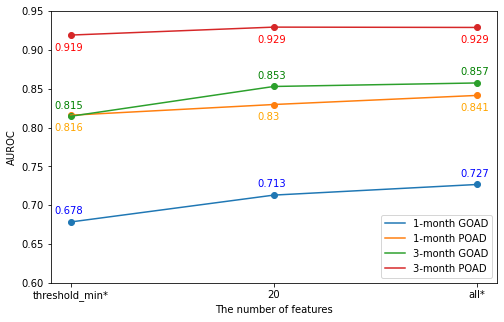

In [8]:
# plot AUC
plt.figure(figsize=(8, 5))
x = [0,1,2]
plt.plot(x, G1_auc_cc_list, label="1-month GOAD")
plt.scatter(x, G1_auc_cc_list)
plt.plot(x, B1_auc_cc_list, label="1-month POAD")
plt.scatter(x, B1_auc_cc_list)
plt.plot(x, G31_auc_cc_list, label="3-month GOAD")
plt.scatter(x, G31_auc_cc_list)
plt.plot(x, B31_auc_cc_list, label="3-month POAD")
plt.scatter(x, B31_auc_cc_list)
plt.ylim((0.6,0.95))
plt.xticks(x, ["threshold_min*","20", "all*"])
plt.xlabel("The number of features", size=10)
plt.ylabel("AUROC", size=10)
plt.legend(loc=4)
for i in range(len(x)):
    plt.annotate(round(G1_auc_cc_list[i], 3), (x[i]-0.08, G1_auc_cc_list[i]+0.01), color="blue")
    plt.annotate(round(B1_auc_cc_list[i], 3), (x[i]-0.08, B1_auc_cc_list[i]-0.02), color="orange")
    plt.annotate(round(G31_auc_cc_list[i], 3), (x[i]-0.08, G31_auc_cc_list[i]+0.01), color="green")
    plt.annotate(round(B31_auc_cc_list[i], 3), (x[i]-0.08, B31_auc_cc_list[i]-0.02), color="red")
#plt.savefig('PLOT/TSR_ALL_AUROC.png', dpi = 300, bbox_inches="tight")
plt.show()